# Explorando diferentes critérios de parada no Método do Gradiente

## Parâmetros iniciais

In [11]:
import numpy as np
from numpy.linalg import norm
from matplotlib import pyplot as plt
from scipy import optimize as opt
from otimo import SecaoAurea
plt.rcParams.update({'font.size': 15})

# Calculo numérico das derivadas
def gradiente(x, fx, func, delta=1e-10):

    # Inicializa o vetor gradiente
    grad = np.zeros(x.size)
    
    # Para cada variável
    for n in range(x.size):
        
        # Vetor com 1 na posição da variável onde a derivada será calculada
        e = np.zeros(x.size)
        e[n] = 1
        
        # Estima a derivada no ponto
        grad[n] = (func(x + delta*e)-fx)/delta
    
    return grad

# Definição da função objetivo
def func(x):
    x1, x2 = x[0], x[1]
    return 2*x1**2 + x2**2 + 2*x1*x2 + x1 - 2*x2 + 3

# Parametros iniciais
x0 = np.array([4, -4], dtype=float) # Ponto inicial

## Critério de parada: estabilização da função-objetivo

Número de iterações: 20


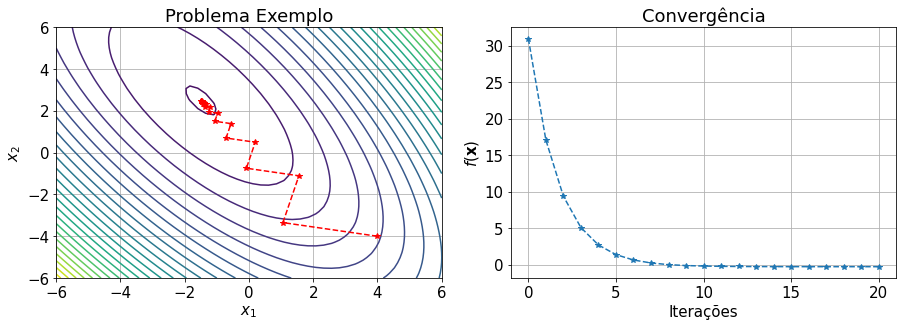

In [15]:
# Definição inicial das variáveis do processo iterativo
x = x0
fx = func(x0)
xhist = [np.copy(x0)]
fxhist = [fx]
criterio_parada = False
iteracoes = 0

# Critério de parada
while not criterio_parada:
    
    iteracoes += 1
    
    # Calcula gradiente
    grad = gradiente(x, fx, func, delta=1e-10)

    # Define a direção de busca
    d = -grad
        
    # A função que representará nossa otimização unidimensional
    def theta(alpha):
        fx = func(x + alpha*d)
        return fx

    # Otimização unidimensional para determinar o passo na direção d
    alpha, _ = SecaoAurea().resolva(theta)
    
    # Atualiza
    x = x + alpha*d
    fx = func(x)
        
    xhist.append(np.copy(x))
    fxhist.append(fx)
    
    # Se já tiverem passadas pelo menos 5 iterações
    if len(fxhist) >= 5:

        fmax = max(fxhist) # O maior f(x) da história
        fmin = min(fxhist) # O menor f(x) da história
        Df = fmax-fmin
        
        df = max(fxhist[-5:])-min(fxhist[-5:])  # Diferença do maior para o
                                                # menor dos últimos 5 valores
        
        # Se a minha maior diferença dos últimos 5 é menor que 0.01% da maior 
        # diferença da história
        if df < 0.0001*Df:
            criterio_parada = True

xhist = np.array(xhist)
fxhist = np.array(fxhist)

# Malha para plotar contorno
x1, x2 = np.meshgrid(np.linspace(-6, 6),
                     np.linspace(-6, 6))


# Avalia função para plotar contorno
f = 2*x1**2 + x2**2 + 2*x1*x2 + x1 - 2*x2 + 3

print('Número de iterações: %d' % iteracoes)

# Plota trajetória
_, axis = plt.subplots(ncols=2, figsize=[2*6.4, 4.8])
axis[0].contour(x1, x2, f, levels=30)
axis[0].plot(xhist[:, 0], xhist[:, 1], '--*r')
axis[0].set_xlabel(r'$x_1$')
axis[0].set_ylabel(r'$x_2$')
axis[0].set_title('Problema Exemplo')
axis[0].grid()

# Plota convergencia
axis[1].plot(fxhist, '--*')
axis[1].set_xlabel('Iterações')
axis[1].set_ylabel(r'$f(\mathbf{x})$')
axis[1].set_title('Convergência')
axis[1].grid()

plt.tight_layout()
plt.show()

## Critério de parada: estabilização do vetor de variáveis

Número de iterações: 23


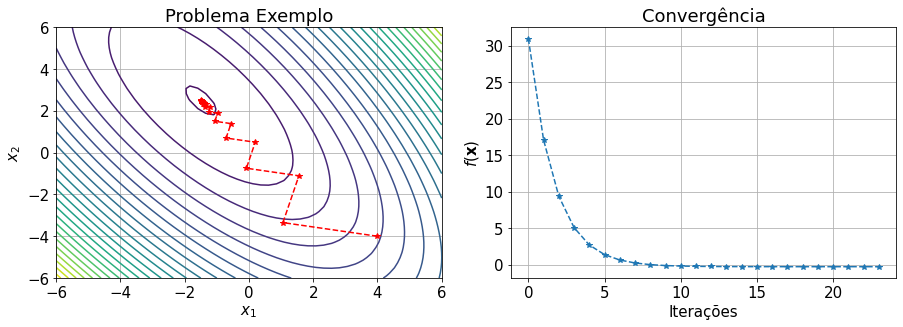

In [13]:
# Definição inicial das variáveis do processo iterativo
x = x0
fx = func(x0)
xhist = [np.copy(x0)]
fxhist = [fx]
criterio_parada = False
iteracoes = 0

# Critério de parada
while not criterio_parada:
    
    iteracoes += 1
        
    # Calcula gradiente
    grad = gradiente(x, fx, func, delta=1e-4)

    # Define a direção de busca
    d = -grad
        
    # A função que representará nossa otimização unidimensional
    def theta(alpha):
        fx = func(x + alpha*d)
        return fx

    # Otimização unidimensional para determinar o passo na direção d
    alpha, _ = SecaoAurea().resolva(theta)
        
    # Atualiza
    x = x + alpha*d
    fx = func(x)
        
    xhist.append(np.copy(x))
    fxhist.append(fx)
    
    # Se já tiverem passadas pelo menos 5 iterações
    if len(xhist) >= 5:

        # Se a norma da diferença do último para o obtido 5 iterações atrás
        # for menor que 1% da norma do último:
        if norm(xhist[-1]-xhist[-5]) <= .01*norm(xhist[-1]):
            criterio_parada = True

xhist = np.array(xhist)
fxhist = np.array(fxhist)

# Malha para plotar contorno
x1, x2 = np.meshgrid(np.linspace(-6, 6),
                     np.linspace(-6, 6))

# Avalia função para plotar contorno
f = 2*x1**2 + x2**2 + 2*x1*x2 + x1 - 2*x2 + 3

print('Número de iterações: %d' % iteracoes)

# Plota trajetória
_, axis = plt.subplots(ncols=2, figsize=[2*6.4, 4.8])
axis[0].contour(x1, x2, f, levels=30)
axis[0].plot(xhist[:, 0], xhist[:, 1], '--*r')
axis[0].set_xlabel(r'$x_1$')
axis[0].set_ylabel(r'$x_2$')
axis[0].set_title('Problema Exemplo')
axis[0].grid()

# Plota convergencia
axis[1].plot(fxhist, '--*')
axis[1].set_xlabel('Iterações')
axis[1].set_ylabel(r'$f(\mathbf{x})$')
axis[1].set_title('Convergência')
axis[1].grid()

plt.tight_layout()
plt.show()

## Critério de parada: aproximação da condição necessária (1ª ordem) de otimalidade

Número de iterações: 32


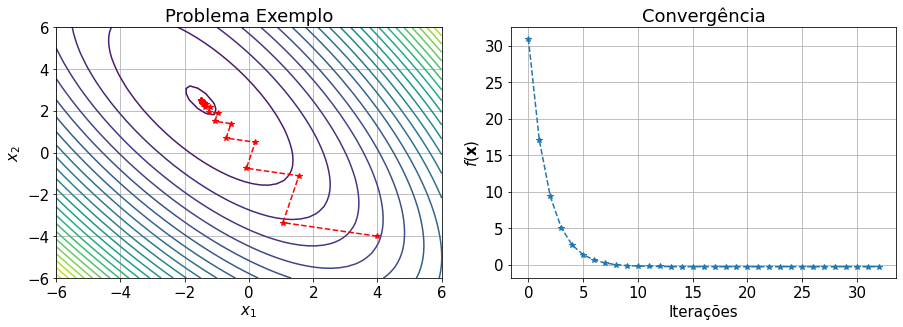

In [14]:
# Definição inicial das variáveis do processo iterativo
x = x0
fx = func(x0)
xhist = [np.copy(x0)]
fxhist = [fx]
criterio_parada = False
iteracoes = 0

# Critério de parada
while not criterio_parada:
    
    iteracoes += 1
        
    # Calcula gradiente
    grad = gradiente(x, fx, func, delta=1e-4)

    # Define a direção de busca
    d = -grad
        
    # A função que representará nossa otimização unidimensional
    def theta(alpha):
        fx = func(x + alpha*d)
        return fx

    # Otimização unidimensional para determinar o passo na direção d
    alpha, _ = SecaoAurea().resolva(theta)
        
    # Atualiza
    x = x + alpha*d
    fx = func(x)
        
    xhist.append(np.copy(x))
    fxhist.append(fx)
    
    # Se já tiverem passadas pelo menos 5 iterações
    if norm(grad) < 0.001:
        criterio_parada = True

xhist = np.array(xhist)
fxhist = np.array(fxhist)

# Malha para plotar contorno
x1, x2 = np.meshgrid(np.linspace(-6, 6),
                     np.linspace(-6, 6))

# Avalia função para plotar contorno
f = 2*x1**2 + x2**2 + 2*x1*x2 + x1 - 2*x2 + 3

print('Número de iterações: %d' % iteracoes)

# Plota trajetória
_, axis = plt.subplots(ncols=2, figsize=[2*6.4, 4.8])
axis[0].contour(x1, x2, f, levels=30)
axis[0].plot(xhist[:, 0], xhist[:, 1], '--*r')
axis[0].set_xlabel(r'$x_1$')
axis[0].set_ylabel(r'$x_2$')
axis[0].set_title('Problema Exemplo')
axis[0].grid()

# Plota convergencia
axis[1].plot(fxhist, '--*')
axis[1].set_xlabel('Iterações')
axis[1].set_ylabel(r'$f(\mathbf{x})$')
axis[1].set_title('Convergência')
axis[1].grid()

plt.tight_layout()
plt.show()